# Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Boston House price dataset

In [3]:
house_price = pd.read_csv(r"C:\Users\dhruv\Downloads\Housing.csv")

In [4]:
house_price.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2


In [6]:
house_price.shape

(509, 14)

In [14]:
# check for missing values
house_price.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
house_price=house_price.dropna()

In [10]:
# statistical measure of the dataset
house_price.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,509.000000,509.000000,506.000000,509.000000,507.000000,509.000000,508.000000,509.000000,508.000000,509.000000,509.000000,509.000000,508.000000,509.000000
mean,3.707516,11.296660,11.198281,0.068762,0.555216,6.279845,68.579134,3.787705,9.610236,409.216110,18.463851,356.664892,12.705276,22.501572
std,8.732089,23.269781,6.856713,0.253298,0.115633,0.703449,28.114744,2.101852,8.735069,168.814161,2.161553,91.562469,7.131979,9.183497
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.880000,45.075000,2.100700,4.000000,279.000000,17.400000,375.330000,7.092500,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.202000,77.150000,3.182700,5.000000,330.000000,19.100000,391.450000,11.430000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.619000,94.100000,5.118000,24.000000,666.000000,20.200000,396.240000,16.992500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Understanding the coorelations between features of the dataset

Positive Coorelation

Negative Coorelation

In [15]:
coorelation = house_price.corr()

<Axes: >

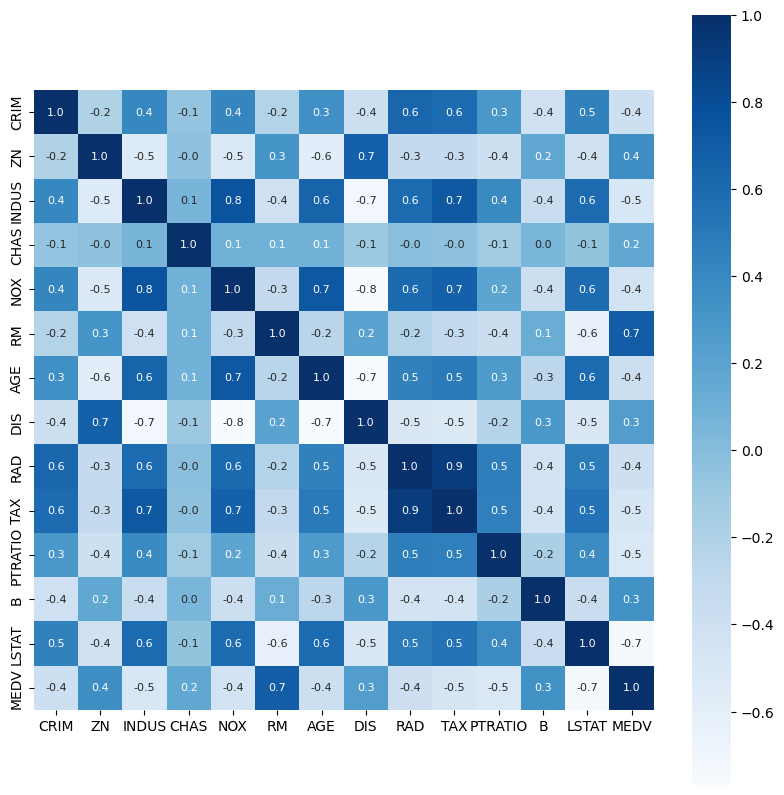

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(coorelation, cbar =True, square =True, fmt ='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# Splitting the data and target

In [17]:
X = house_price.drop('MEDV', axis =1)
Y = house_price['MEDV']

In [18]:
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900  1.0  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671  2.0  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671  2.0  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622  3.0  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622  3.0  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
504  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786  1.0  273   
505  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875  1.0  273   
506  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675  1.0  273   
507  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889  1.0  273   
508  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050  1.0  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [19]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
504    22.4
505    20.6
506    23.9
507    22.0
508    11.9
Name: MEDV, Length: 501, dtype: float64


# Splitting the data into training and test

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=2)

In [22]:
print(X.shape, X_train.shape,X_test.shape)

(501, 13) (400, 13) (101, 13)


MODEL TRAINING

XGBOOST regressor

In [23]:
# loading the moodel 
model = XGBRegressor()

In [24]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Evaluation

Prediction on training data

In [25]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [26]:
print(training_data_prediction)

[19.694437  24.690327  31.196133  50.003117   7.205849  22.479443
 21.177572  27.079733  22.015966  19.614859  28.403128  21.425232
 20.099613  33.312054  31.732903  10.203807  19.898218  20.49671
 10.504303  30.059328  23.61513   20.978367  33.111526  29.798826
 17.59867   13.401141  16.232756  23.397394  28.093084  10.404764
 18.313267  22.59643   30.695543  18.619175  24.50273   21.427568
 23.801579  17.731516   7.404449  13.407375  14.522776  30.495474
 15.001811  21.707245  20.197508  19.104958  27.49826   18.742273
 30.107351  16.19757   23.916445  32.903522  49.998672  37.28679
 31.984137  12.72415   32.20251   21.490744  17.507002  29.58942
 22.013113  15.225186  27.46975   25.122818  36.184467  20.258974
 23.912453  33.421017  21.194408  19.095875   6.3087945 29.890211
 12.522974  21.40982   49.987823  26.363913  23.772533  39.805485
 13.39264    5.0061274 17.190304  23.733566  20.388262  24.39741
 49.996414  44.79631   36.98893   19.694437  25.007818  21.617628
 11.476594  27

In [29]:
# R squared error
score1 = metrics.r2_score(Y_train, training_data_prediction)


#Mean absolute error
score2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error: ", score1)
print("Mean Absolute error: ", score2)

R squared error:  0.999997899658494
Mean Absolute error:  0.009446305036544835


VISUALIZE THE ACTUAL PRICE AND PREDICTED PRICES

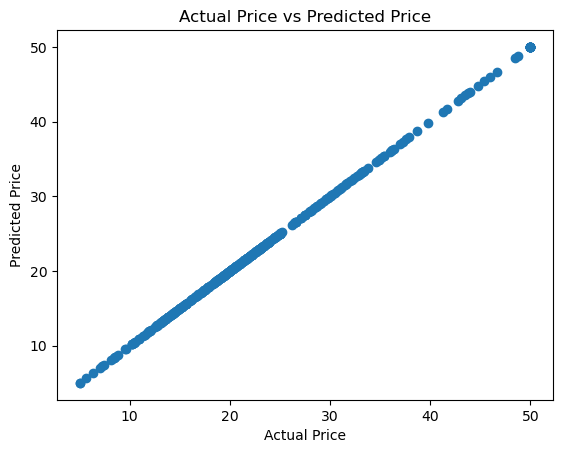

In [33]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Prediction on test data

In [31]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [32]:
# R squared error
score1 = metrics.r2_score(Y_test, test_data_prediction)


#Mean absolute error
score2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error: ", score1)
print("Mean Absolute error: ", score2)

R squared error:  0.8919630333701825
Mean Absolute error:  2.0186370972359535


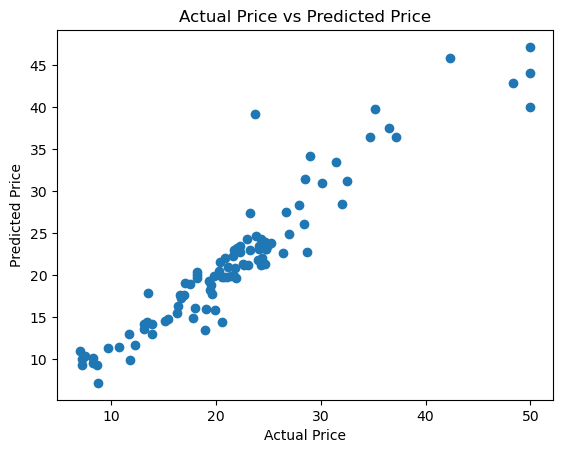

In [34]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()